# Arrays, Dataframes, Plotting

The aim of this tutorial is to give some of the basics needed to get started with machine learning (ML) in python, namely how to work with arrays, dataframes, and plotting using the relevant python libraries. It is generally assumed that you're familiar with the basics python if you're going through this.

When doing ML, the arrays we usually work with are large multidimensional arrays containing mostly numerical data. It turns out that the base python way of dealing with arrays, i.e. the `list`, is inefficient for manipulating large numerical arrays. To get around this, we use the much faster and more complete _Numpy_ package. Numpy is specifically built for doing numerical array processing in python. It is essentially a wrapper written on top of fast _C_ libraries that were written years ago for doing linear algebra. While there is some overhead in translating the python code over to C to perform these operations, it's usually worth it. Moreover, numpy gives access to all kinds of neat functions for doing operations on numerical arrays, including a whole suite of linear algebra routines. Using lists, not only would your code be slower, but you'd have to tediously do a lot of these numerical operations yourself.

## Numpy Basics

The usual convention for using numpy is to first call `import numpy as np`. To use numpy functions, we need to prefix each function call with `np.`. You'll see more examples of this below. 

Let's start by importing numpy, and creating an empty numpy array that I'll call `A`. You can see that the `np.array` function is what we call to create a numpy array. The easiest way is to pass in a list containing whatever you want in the array. Note numpy arrays follow the same row, column, and indexing conventions as python lists.

In [1]:
import numpy as np

In [2]:
A = np.array([])
print(f'Elements of A: {A}')

Elements of A: []


Like python lists, we can interact with an array by calling methods on it. One example might be if we wanted to know what the shape of a given array is. To get this on our new array `A`, we call `A.size`, which prints a tuple of the form `(n_rows, n_columns, n_depth, ...)` where the ith element of the tuple gives the number of elements in the ith dimension of the array. Since `A` is an empty array it has no elements along any dimension, so we just get `(0,)` by convention.

To give a better example, I create a 2-dimensional array `X` again and print its size, which prints as `(3,2)`, meaning there are 3 rows and 2 columns in `X`, which you can clearly see printed out.

Note: The base python `len` function works on numpy arrays as well. However, it only returns the length of the first dimension of the array, i.e. the number of rows.

In [3]:
print(f'Shape of A: {A.size}')
print()

X = np.array([[1, 2], [3, 4], [5, 6]])
print(f'Elements of X:\n {X}')
print()
print(f'Shape of X: {X.size}')
print(f'Length of X: {len(X)}')

Shape of A: 0

Elements of X:
 [[1 2]
 [3 4]
 [5 6]]

Shape of X: 6
Length of X: 3


We can index into an array similarly to lists. Numpy, like python, is also zero-indexed, so the first element of 1-D array `x` would be `x[0]` and the last would be `x[-1]` or `x[len(x)]`.

For multi-dimensional arrays like matrices or tensors or whatever, the index convention is slightly different from lists.
- For a 1D array `x`, to index into element `i`, call `x[i]`.
- For a 2D array `A`, to index the `(i,j)` element , call `A[i,j]`.
- For a 3D array `T`, to index into the `(i,j,k)` element , call `T[i,j,k]`.

In [4]:
A = np.array([[1, 2], [3, 4]])

print(f'A = \n{A}')
print()

n_rows, n_cols = A.shape

for i in range(n_rows):
    for j in range(n_cols):
        print(f'A[{i},{j}] = {A[i,j]}')

A = 
[[1 2]
 [3 4]]

A[0,0] = 1
A[0,1] = 2
A[1,0] = 3
A[1,1] = 4


It's often very useful to be able create simple, large arrays instantly. Here are 4 common ways one might want to initialize a new array:

- `np.zeros(size)`: Initialize an array with zeros and fill them in later.
- `np.ones(size)`: Initialize an array with a non-zero value, usually 1.
- `np.eye(n_rows)`: Initialize the diagonal elements of a square multidimensional array to 1 and the off-diagonal elements to 0.
- `np.random.rand(size)`: Initialize an array with random values between 0 and 1.

Pretty simple to do. Here are some examples.

In [5]:
print(f'length 10 vector of zeros: \n {np.zeros((10,))}')
print()
print(f'size (5, 5, 5) array of 5s: \n {5 * np.ones((5, 5, 5))}')
print()
print(f'size (3,3) identity matrix: \n {np.eye(3)}')
print()
print(f'size (2, 3) random matrix: \n {np.random.rand(2, 3)}')

length 10 vector of zeros: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

size (5, 5, 5) array of 5s: 
 [[[5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]]

 [[5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]]

 [[5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]]

 [[5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]]

 [[5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]
  [5. 5. 5. 5. 5.]]]

size (3,3) identity matrix: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

size (2, 3) random matrix: 
 [[0.65133474 0.03270469 0.04785048]
 [0.43401002 0.02818242 0.64025992]]


## Array Algebra

By default, numpy operations are **element-wise**. For example, if I add the matrices (i.e. 2D arrays) `A` and `B` together as `A + B`, the operation is performed element-by-element: 

`(A + B)[i,j] = A[i,j] + B[i,j]`.

While this agrees with what you learn in math class, this is *not* true for other operations. In particular, numpy multiplication is element-by-element, not matrix multiplication!

`(A * B)[i,j] = A[i,j] * B[i,j]`

To get standard math matrix multiplication in numpy you can either use `np.matmul(A, B)`, `np.dot(A, B)`, or the shortcut `@` operator as `A @ B`. I'll use the `@` operator mostly.

`(A @ B)[i,j] = A[i,0] * B[0,j] + A[i,1] * B[1,j] + ... + A[i,n] * B[m,j]`

Similarly, division is *not* matrix inversion, but element-by-element division:

`(A / B)[i,j] = A[i,j] / B[i,j]`

And exponentiation is also element-by-element:

`(A ** 2)[i,j] = A[i,j] ** 2`.

Below I show some examples of this on two matrices `A` and `B`.

In [6]:
A = np.array([[1, 1], [1, 1]])
B = np.array([[2, 2], [2, 2]])

print(f'A = \n{A}')
print(f'B = \n{B}')

print(f'A + B = \n{A + B}')
print(f'A - B = \n{A - B}')
print(f'A * B = \n{A * B}')
print(f'A / B = \n{A / B}')
print(f'A**2 = \n{A ** 2}')

A = 
[[1 1]
 [1 1]]
B = 
[[2 2]
 [2 2]]
A + B = 
[[3 3]
 [3 3]]
A - B = 
[[-1 -1]
 [-1 -1]]
A * B = 
[[2 2]
 [2 2]]
A / B = 
[[0.5 0.5]
 [0.5 0.5]]
A**2 = 
[[1 1]
 [1 1]]


## Broadcasting

One very useful feature that numpy supports is array *broadcasting*. Broadcasting is a set of conventions for doing operations on arrays of different sizes.

Here's an example. Suppose you have 1D array `x` and would like to add `5` to each element of `x`. Rather than do something tedious like this,

```
for i in range(len(x)):
    x[i] = x[i] + 5
```

we can simply agree that the expression `x + 5` means exactly that. In math class you probably learned that you can't add 2 vectors or arrays of different sizes, but obviously you can so long as we can agree on a consistent convention for doing so, which is what broadcasting does. The same convention holds for any arithmetic operator. Here are some examples of broadcasting a scalar with `x`.

In [7]:
x = np.array([1, 2, 3, 4, 5])

print(f'x = {x}')
print(f'x + 5 = {x + 5}')  # returns each element of x plus 5
print(f'x - 5 = {x - 5}')  # returns each element of x minus 5
print(f'5 * x = {5 * x}')  # returns 5 times element of x
print(f'x / 5 = {x / 5}')  # returns 1/5 of each element of x
print(f'1 / x = {1 / x}')  # returns reciprocal of each element of x

x = [1 2 3 4 5]
x + 5 = [ 6  7  8  9 10]
x - 5 = [-4 -3 -2 -1  0]
5 * x = [ 5 10 15 20 25]
x / 5 = [0.2 0.4 0.6 0.8 1. ]
1 / x = [1.         0.5        0.33333333 0.25       0.2       ]


Broadcasting also works just as well with higher dimensional arrays like matrices. For example, adding `1` to each element of a size `(2,2)` array `A` can be done with `A + 1` or even `A += 1`. The new wrinkle with higher dimensional arrays though is that we can also broadcast arrays other than scalars too. For example, we can add a matrix and a vector. 

Suppose we wanted to add `1` to all elements in the first row of `A` and `2` to all elements in the second row. We could do that by creating a column vector `x`, i.e. a shape `(len(x), 1)` array, and then calling `A + x`. Note that broadcasting rules require that `x` be a column vector for this operation to do what we just specified. 

Row vectors `(1, len(x))` or "flattened" vectors `(len(x),)` do something different. They add these elements to the *columns* instead of the *rows*, so do be careful!

We can see an example of this below. I create a column vector `x = [[1], [2]]` and perform `A + x` to verify that it indeed adds elements of `x` to the *rows* of `A`. I then use a quick trick to get the row vector of `x`, which is taking its *transpose* `x.T = [[1, 2]]`, and confirm that `A + x.T` adds `x` to the *columns* instead.

Broadcasting can be quite complicated as you operate on arrays of arbitrary different sizes. You can see the rules and more examples in the numpy documentation [here](https://numpy.org/doc/stable/user/basics.broadcasting.html).

In [8]:
A = np.array([[0, 0], [0, 0]])
x = np.array([1, 2]).reshape(-1, 1)

print(f'A = \n{A}')
print(f'x = \n{x}')
print(f'A + x = \n{A + x}')
print(f'x.T = \n{x.T}')
print(f'A + x.T = \n{A + x.T}')

A = 
[[0 0]
 [0 0]]
x = 
[[1]
 [2]]
A + x = 
[[1 1]
 [2 2]]
x.T = 
[[1 2]]
A + x.T = 
[[1 2]
 [1 2]]


## Useful Array Operations

Below is a list of some of the most useful operations one might do on arrays in practice. It's by no means exhaustive. I define a vector `x` and perform these operations on it, and allow Jupyter to show you the outputs. Note that, where ambiguous, each function called that returns an array is performed element-wise.

In [9]:
# this piece is useful to automatically print the output of every line without calling print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
x = np.array([1, 2, 3, 4, 5])

**Statistical Functions**

In [11]:
np.mean(x) # mean of x
np.std(x)  # std deviation of x
np.median(x)  # median of x
np.min(x)  # min of x
np.max(x) # max of x
np.percentile(x, 50) # 50th percentile of x

3.0

1.4142135623730951

3.0

1

5

3.0

**Mathematical Functions**

In [12]:
np.exp(x)  # exponential function
np.log(x)  # natural log
np.log10(x)  # base-10 log
np.log2(x)  # base-2 log
np.sin(x)  # similar for other trig and hyperbolic trig functions

array([  2.71828183,   7.3890561 ,  20.08553692,  54.59815003,
       148.4131591 ])

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791])

array([0.        , 0.30103   , 0.47712125, 0.60205999, 0.69897   ])

array([0.        , 1.        , 1.5849625 , 2.        , 2.32192809])

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427])

**Other Useful Functions**

In [13]:
np.isnan(x)  # generate a binary mask that finds NaNs
np.isinf(x)  # generate a binary mask that finds infinities
np.allclose(x, 0)  # returns boolean indicating if all elements of x are close to 0
x.reshape(-1, 1)  # reshape x to be a column vector of size (len(x), 1)
x.reshape(1, -1)  # reshape x to be a row vector of size (1, len(x))
x.flatten()  # reshape x to be a flattened vector of size (len(x),)
np.transpose(x.reshape(1, -1))  # transpose row vector of x (i.e. convert to a column vector)

array([False, False, False, False, False])

array([False, False, False, False, False])

False

array([[1],
       [2],
       [3],
       [4],
       [5]])

array([[1, 2, 3, 4, 5]])

array([1, 2, 3, 4, 5])

array([[1],
       [2],
       [3],
       [4],
       [5]])

**Random Numbers and Seeds**

Random numbers come up literally all over the place when doing ML. We can generate (uniform) random numbers from 0 to 1 in python using the `np.random.rand()` function. This (pseudo) random function will generate numbers that appear to be uncorrelated to each other. Random numbers are often useful for initializing parameters for models before training. Here's an example that generates a length 10 vector of random numbers using this function.

In [14]:
np.random.rand(10)

array([0.08402557, 0.24166896, 0.11950586, 0.8866006 , 0.01957024,
       0.22569477, 0.53050189, 0.82691431, 0.40628222, 0.67113098])

When working with random numbers (or doing any ML or statistics programming) it's useful to set a *seed*. A seed is a way of insuring that random code will generate consistent outputs, so that you can go back and verify that something is working correctly or reproduce somebody else's results (e.g. somebody's shiny new ML model in a paper). If you just always remember to set a seed at the top of your notebooks and scripts you won't have to worry about this. Rarely do you need to worry about changing how you call the seed (but when you do it can be annoying). 

Numpy will set the seed based on a number you pass to `np.random.seed`. Each number you pass in will generate a different seed, which will be used to generate its own unique ordered string of real numbers as you call them later on. Usually you just pick a number for that script and stick with it. Here's how you set the seed in numpy using an initial value of `123`. Note that seeds won't return values. They just alter the random state on the back end.

In [15]:
np.random.seed(123)

**Linear Algebra**

As numpy was in large part written to port much of the optimized linear algebra routines from C over to python, it's useful to at least mention how you might go about doing some common linear algebra operations in python. Most of the linear algebra specific functions in numpy are in the `np.linalg` submodule.

I do these operations on a random matrix `A` of size (3,3). Note many of these operations will only work on square matrices (i.e. 2D arrays with `n_rows = n_cols`). 

In [16]:
A = np.random.rand(3, 3)
print(A)

[[0.69646919 0.28613933 0.22685145]
 [0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319 ]]


In [17]:
np.linalg.det(A)  # determinant of A
np.linalg.norm(A)  # norm of A
np.linalg.eigvals(A)  # eigenvalues of A
np.linalg.cond(A)  # condition number of A
np.dot(A[:, 0], A[:, 1]) # dot product of first 2 column vectors of A

0.007629581960897938

1.8114068992687016

array([1.57478362, 0.30626743, 0.015819  ])

134.71707077366864

1.267597588113167

In [18]:
A.T  # transpose of A
np.linalg.inv(A)  # inverse of A
np.linalg.eig(A)  # spectral decomposition of A = P D P^T returning (diag(D), P)
np.linalg.svd(A)  # singular value decomposition of A = U S V^T returning (U, diag(S), V)

array([[0.69646919, 0.55131477, 0.9807642 ],
       [0.28613933, 0.71946897, 0.68482974],
       [0.22685145, 0.42310646, 0.4809319 ]])

array([[  7.37388936,   2.32530266,  -5.52391739],
       [ 19.63709267,  14.74084246, -22.23110727],
       [-43.00008309, -25.73241835,  45.00051613]])

(array([1.57478362, 0.30626743, 0.015819  ]),
 array([[-0.37709639, -0.56243378, -0.10645042],
        [-0.59441707,  0.82373705, -0.44980612],
        [-0.71025817, -0.07159278,  0.8867597 ]]))

(array([[-0.42526482,  0.64749518, -0.63237633],
        [-0.54489273, -0.74105482, -0.39233872],
        [-0.72266296,  0.17772941,  0.66795996]]),
 array([1.78221958, 0.32359437, 0.01322935]),
 array([[-0.73243119, -0.56593447, -0.37850064],
        [ 0.6697169 , -0.69895445, -0.25088235],
        [-0.12257173, -0.43724233,  0.89095191]]))

In [19]:
A = np.random.rand(3, 3)
b = np.random.rand(3)

np.linalg.solve(A, b)  # solve Ax = b for x

array([ 0.84895017, -0.39968981,  0.46063786])

Since linear regression is basically linear algebra, just for fun, here's an example of solving exactly for the learned parameters `beta` of a linear fit of a data matrix `X` with regression outputs `y`. Note that the optimal learned parameters are given exactly by solving $X^T X \beta = X^T y$, i.e. 

`X.T @ X @ beta = X.T @ y`.

In [20]:
n_samples = 100
n_features = 10

X = np.random.rand(n_samples, n_features + 1)  # initialize data matrix X
X[:, 0] = np.ones(n_samples)  # set first column to 1s (for the bias term)
y = np.random.normal(size=n_samples)  # initialize target vector y with std gaussian noise
beta = np.random.rand(n_features + 1)  # randomly initialize parameters to be learned (bias + weights)

beta = np.linalg.solve(X.T @ X, X.T @ y)  # solve (X^T X) beta = X^T y
print(f'bias = {beta[0]}')
print(f'weights = \n{beta[1:]}')

bias = -0.414327350801323
weights = 
[ 0.16820157 -0.04016259 -0.02762474  0.00394075  0.23982223  0.05215829
 -0.34087291  0.80669608  0.52804099 -0.50217788]


**Operations on Multidimensional Arrays**

When arrays are multidimensional, many of these numpy functions can be called along particular dimensions of the array (called an "axis" in numpy). For example, suppose you have a 2D array `X`, where each row of `X` represents some data point and each column of `X` represents some input variable (i.e. feature) in the data. You may want to normalize your data to do ML, but need to treat each column differently because each represents different things. One way to do this is to take each column, subtract off its mean, and divide by its standard deviation:

`X_normalized[:, j] = (X[:, j] - np.mean(X[:, j])) / np.std(X[:, j])`

But you only want the mean and standard deviation of *that particular column*, not the mean and standard deviation of *all values in the dataset*. Rather than doing something tedious like iterating through all the columns of `X` and doing this one by one on column vectors, numpy allows us to simultaneously take these column statistics across all columns at once by passing in the `axis=0` command to `np.mean` and `np.std`. Passing `axis=0` means "do these operations the rows, but for each column separately". Passing instead `axis=1` would mean the opposite: "do these operations the columns, but for each row separately".

Here's an example containing 5 examples each with 3 features. We can normalize this whole matrix in one line of code. Notice that the values in the normalized matrix are much closer to each other, and consistently sized across columns. That's the point, as it makes many ML models easier to train.

In [21]:
X = np.array([[1, 10, 100], [0, 0, 0], [1, 10, 100], [0, 0, 0], [1, 10, 100]])
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


print(f'X = \n{X}')
print()
print(f'X_normalized = \n{X_normalized}')


X = 
[[  1  10 100]
 [  0   0   0]
 [  1  10 100]
 [  0   0   0]
 [  1  10 100]]

X_normalized = 
[[ 0.81649658  0.81649658  0.81649658]
 [-1.22474487 -1.22474487 -1.22474487]
 [ 0.81649658  0.81649658  0.81649658]
 [-1.22474487 -1.22474487 -1.22474487]
 [ 0.81649658  0.81649658  0.81649658]]


## Pandas Basics

We now turn to dataframes, which can be thought of as arrays with tags attached to them. While numpy arrays are meant for doing stuff like statistics and linear algebra, dataframes are meant for inspecting and cleaning data. In ML, often we might start by loading our data from a file into a dataframe, clean and transform our data, and then convert it to a numpy array for doing the actual machine learning.

In python, the standard dataframe library is Pandas. Pandas is a very powerful library capable of doing everything from loading data, cleaning data, visualizing data, and exporting or saving data to new files. The conventional way to load pandas in python is by calling `import pandas as pd`. This means any pandas function or data structure will be prefixed by `pd.`.

While it is possible (and often taught first) how to create a dataframe from scratch in pandas, e.g. by passing in a dictionary, I will instead initialize a dataframe by loading in data from a csv file, which in my experience is the most common way data scientists actually get data into a dataframe (along with importing from SQL or an Excel spreadsheet). I will load the Titanic dataset from this link (pandas lets you load data directly from a URL just as easily as from a local file): https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv

I save the URL as a string `url`, then call the `pd.read_csv` function passing in that string. This will cause pandas to fetch that data and load it into a dataframe that by convention is called `df`. To show everything worked fine, I'll print out the top 5 data examples using `df.head()`, and then inspect the data using `df.info()`. Looks like everything loaded fine.

In [22]:
import pandas as pd

In [23]:
url = 'https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Since this tutorial isn't focused on data cleaning, I'm going to ignore how messy this data is for now and just focus on some of the essential pandas operations you can do on this dataframe.

First, observe the `df.head()` output. We can clearly see that each example of data is a row (in this case a passanger aboard the Titanic), and each column is some sort of attribute about that person (ID, name, age, cost of fare, whether they survived the wreck, etc). Also observe the left-hand bolded column. This is the *index*. By default, when you load a new dataframe, pandas will give it a new index starting from 0. The index is how you manipulate the rows of the dataframe. You're free to reset the index if you wish, or even set another column (e.g. the ID column) as the index.

Second, observe the `df.info()` printout. We can see that the dataframe contains 12 columns of data, each with 891 examples (possibly with missing values in some columns). It looks like columns 0, 1, 2, 6, 7 are integer-valued data (they appear to be categorical data labeled with integer values); columns 3, 4, 8 are objects (usually meaning they're encoded by pandas as strings); and columns 5, 9 are float-valued data (numerical values like age and cost of ticket). We can see that the dataframe takes up almost 84 kB of RAM, which isn't bad. We can also see that columns 5, 10, 11 contain some missing values which will need to be dealt with in the data cleaning process.

Moving on, one useful operation we might want to do with a dataframe is to inspect the dataframe for missing values, and possibly drop the rows with any missing values. We can do this using `df.dropna()`. This will literally throw out examples with *any* missing values in them at all (which is often more than you'd want to do in real data cleaning since you're throwing away data from the other columns). Notice that dropping missing values cuts the dataframe size down to only 183 examples. Also, note that like most pandas operations, this doesn't alter the dataframe in place. So if you want the new dataframe you'd need to save it using `df = df.dropna()` or something similar.

If we don't want to drop missing values (which we rarely do), we can instead choose to impute them with some other value. For example, we can set all missing values to 0. We can achieve this with `df.fillna(0)`. This will keep all the rows, but fill every single missing value in the dataframe with 0.

In [25]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [27]:
df.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Similar to missing values, we might also be interested in looking for and perhaps dropping duplicate values. We can do this by calling `df.drop_duplicates()`. By default, this will drop rows where every single entry is identical. Evidently this data contains no duplicate rows.

In [28]:
df.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We can index into a particular column of the dataframe by passing in the name of the column. Suppose we just want the names of people on the Titanic. Then we could call `df['Name']` to get a one-column dataframe (technically called a series in pandas) with just those names.

We can also fetch multiple columns into a new dataframe. Suppose we want to keep name, sex, and age but drop everything else. We can do this by passing in a list of column names that we want to keep, namely `df[['Name', 'Sex', 'Age']]`. We can also explicitly drop the rows we don't want by calling `df.drop(columns=['PassengerId', 'Survived', 'Pclass'])` etc.

In [29]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [30]:
df[['Name', 'Sex', 'Age']]

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


In [31]:
df.drop(columns=['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'])

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",male,27.0
887,"Graham, Miss. Margaret Edith",female,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN
889,"Behr, Mr. Karl Howell",male,26.0


Using column indexing, we can start cleaning up the data. Suppose we wanted age to be cast as an integer rather than a float. We can do that by indexing into that column, changing the datatype to an integer using `df['Age'].astype(int)`, and resaving this new dataframe to `df`. Since some people evidently have missing ages, we first need to impute those with a numerical value. I'll impute them with 0s. Inspecting the new dataframe we can now see that the ages are integer-valued.

In [32]:
ages = df['Age']
ages = ages.fillna(0)
ages = ages.astype(int)
df['Age'] = ages
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


For some columns we may want to replace what appear to be boolean values with 0 and 1 or similar. Similarly with other categorical values, where we may want to replace strings with integers representing each category.

Let's look at the sex column. We can see that the values shown are `male` or `female`. For doing data science work we probably want those to be integers, and given that there are only 2 values it's a natural choice to map them to 0 and 1, say `male=0` and `female=1`. We can do this by calling `df.replace` and mapping each string to its respective integer value.

In [34]:
df = df.replace(to_replace='male', value=0)
df = df.replace(to_replace='female', value=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


Pandas can also do smart indexing. Suppose we want to look at the subset of the data where passengers did not survive. We can do this by indexing the dataframe with the boolean `df['Survived'] == 0`. Just about any boolean indexing you can think of you can do with dataframes, making it very efficient to slice, subset, and manipulate them once you get used to it. To get the data with only the non-survivors, we just pass this mask into the dataframe itself. Doing so, we can see that 549 of the original 891 people did not survive.

In [35]:
df['Survived'] == 0

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Survived, Length: 891, dtype: bool

In [36]:
df[df['Survived'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",0,25,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0,1,2,W./C. 6607,23.4500,NaN,S


It's useful to note that pandas supports a lot of the array arithmetic operations that numpy does. Suppose for example you wanted to add `5` to the passenger ID column. You can do that the same way you would in numpy, where you treat `df['PassengerId']` as a vector and add `5` to it via broadcasting.

In [37]:
df['PassengerId'] + 5

0        6
1        7
2        8
3        9
4       10
      ... 
886    892
887    893
888    894
889    895
890    896
Name: PassengerId, Length: 891, dtype: int64

The statistical operations from numpy often work too (mean, std, max, min, etc). The difference is that in pandas these are methods rather than functions (note you can also call them as array methods in numpy too, I just didn't want to confuse you above by doing both). If we wanted to normalize the age column of the dataframe, similar to numpy, we might do something like this:

In [38]:
age = df['Age']
age.head()
age_normalized = age - age.mean() / age.std()
age_normalized.head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int64

0    20.648467
1    36.648467
2    24.648467
3    33.648467
4    33.648467
Name: Age, dtype: float64

Once you're done inspecting and cleaning your data, you can either convert the data you want over to an array to start doing ML or analytics work, or save the cleaned output to a file, e.g. a csv. To convert a dataframe to a numpy array, we just call `df.to_numpy()`. To save the dataframe to a new csv file we just call `df.to_csv(file_name)`.

In the example below, I convert the first 3 columns in the dataframe to a numpy array and verify that it's a (891, 3) array as intended. You can see the first 10 rows of this array below to verify.

In [39]:
X = df[['PassengerId', 'Survived', 'Pclass']].to_numpy()
X.shape

(891, 3)

In [40]:
X[:10, :]

array([[ 1,  0,  3],
       [ 2,  1,  1],
       [ 3,  1,  3],
       [ 4,  1,  1],
       [ 5,  0,  3],
       [ 6,  0,  3],
       [ 7,  0,  1],
       [ 8,  0,  3],
       [ 9,  1,  3],
       [10,  1,  2]])

## Matplotlib Basics

It's very important when doing data science to look at your data. That sometimes means inspecting the values in the dataframes and arrays, but it most often means making plots of your data to get an idea what's going on and what might be wrong. The standard python library for plotting is Matplotlib. I won't go into great depth here on how to make pretty plots. Rather, I'll just show how to throw together a few simple plots.

The most common part of matplotlib people use is the pyplot submodule that does the actual plotting. It's conventional to import this via `import matplotlib.pyplot as plt` or `from matplotlib import pyplot as plt`. Thus, all plotting functions are prefixed with `plt.`.

Let's start by loading matplotlib and generating some data to plot. To keep the plots simple, I'll focus on 1D and 2D arrays. Note that matplotlib supports both numpy arrays and pandas dataframes as inputs, so long as the values are numerical.

To do some simple plotting like you might do in a math class, I'll create a grid of inputs, pass them into a function, and plot the inputs vs the outputs. Generating a grid of points in numpy is done using `np.linspace(start_point, stop_point, n_points)`. Below, I generate an input grid `x` with 100 points from 0 to 5. I then generate my outputs `y` on this grid, and plot them using `plt.plot(x, y)`. Plotted we can see a graph of x vs y from the given range of 0 to 5.

In [41]:
import matplotlib.pyplot as plt

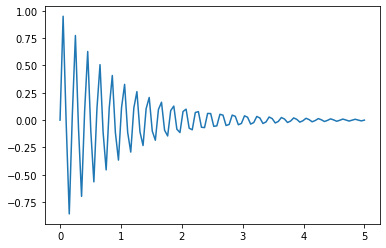

In [42]:
x = np.linspace(0, 5, 100)
y = np.sin(10 * np.pi * x) * np.exp(-x)

plt.plot(x, y);

If we wish, we can decorate the above plot by giving it a title, x axis label, and y axis label. We might also choose to overlay a second plot of the decaying exponential enveloping the above function damping sinusoid function. Notice that we can pass (a limited subset of) latex into plot titles to nicely render math, which is sometimes useful. Also notice that when overlaying multiple plots on top of each other, we need to end the plot by calling `plt.show()`, which tells matplotlib to stop and render everything above it as one single plot.

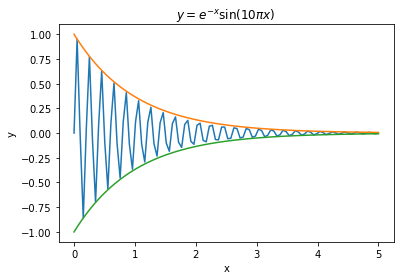

In [43]:
z = np.exp(-x)

plt.plot(x, y)
plt.plot(x, z)
plt.plot(x, -z)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$y = e^{-x }\sin(10\pi x)$')
plt.show();

Let's now look at a couple of other useful plots a data scientist might frequently use. One is the scatter plot, which is probably the most useful way for visualizing real-world data inputs vs outputs (if the outputs are continuous). We can create a scatter plot simply by using `plt.scatter`. Here's an example with some fake data, where `x` is generate using `rand` and `y` is just a linear function of `x` with some small noise added to it to look real-ish.

We can see from the plot that `x` and `y` have what appears to be a linear relationship with positive slope, suggesting that something like linear regression might work well for the problem of predicting `y` given `x`.

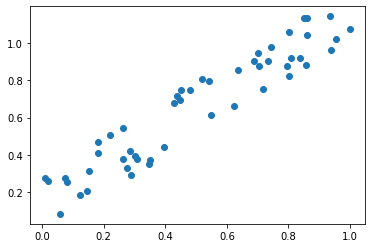

In [44]:
x = np.random.rand(50)
y = x + 0.3 * np.random.rand(50)

plt.scatter(x, y);

If the input data is continuous but the outputs are discrete labels, instead of a scatter plot, we might wish to make a histogram showing how often each label appears in the dataset. Here we do that using `plt.hist`. I generate `x` the same as the above cell, but `y` by randomly selecting integers from the set `[a, b, c]`. You can see that the label `c` shows up the most, with `b` second and `a` last. If you look at the weights I passed into `p=` below, you can see how it ended up that way.

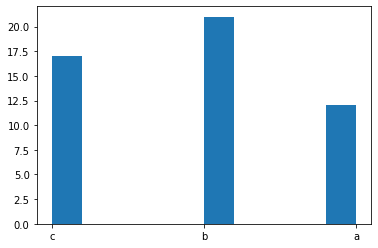

In [45]:
x = np.random.rand(50)
y = np.random.choice(['a', 'b', 'c'], size=len(x), p=[0.2, 0.5, 0.3])

plt.hist(y);

As a final example for now, let's consider the boxplot, which is often used to plot continuous sets of data from different distributions against each other to see how they vary. We can do this in matplotlib using `plt.boxplot`. I create the data by sampling 3 different vectors from gaussians of differing means and variances, join them together into a single array `X`, and then call `plt.boxplot(X)`. 

From the plot, you can see that `x2` has both the highest mean value (the orange lines are the means) and the largest spread (the lengths of the boxes are the spreads, technically the "interquantile range"). The points outside of the "whiskers" are the outliers from each distribution.

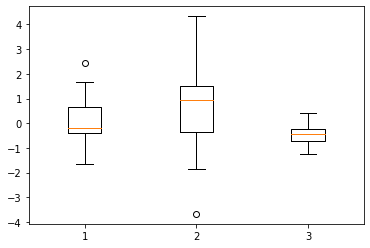

In [46]:
x1 = np.random.normal(0, 1, size=20)
x2 = np.random.normal(0.5, 1.5, size=20)
x3 = np.random.normal(-0.5, 0.5, size=20)

X = np.array([x1, x2, x3]).T

plt.boxplot(X);

This concludes my tutorial on the basics of arrays, dataframes, and plotting for machine learning. I'll go into more depth into some of this in future tutorials. Feel free to go through those as well, or explore the documentation for these libraries along with the many blog posts out there about them. What I covered only barely begins to scratch the surface of what these libraries can do.